<a href="https://colab.research.google.com/github/fedhere/MLTSA22_FBianco/blob/main/%3Aab2Distributions/StationaryTSAnimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AIM: creating an accessible visualization of a stochastic time series



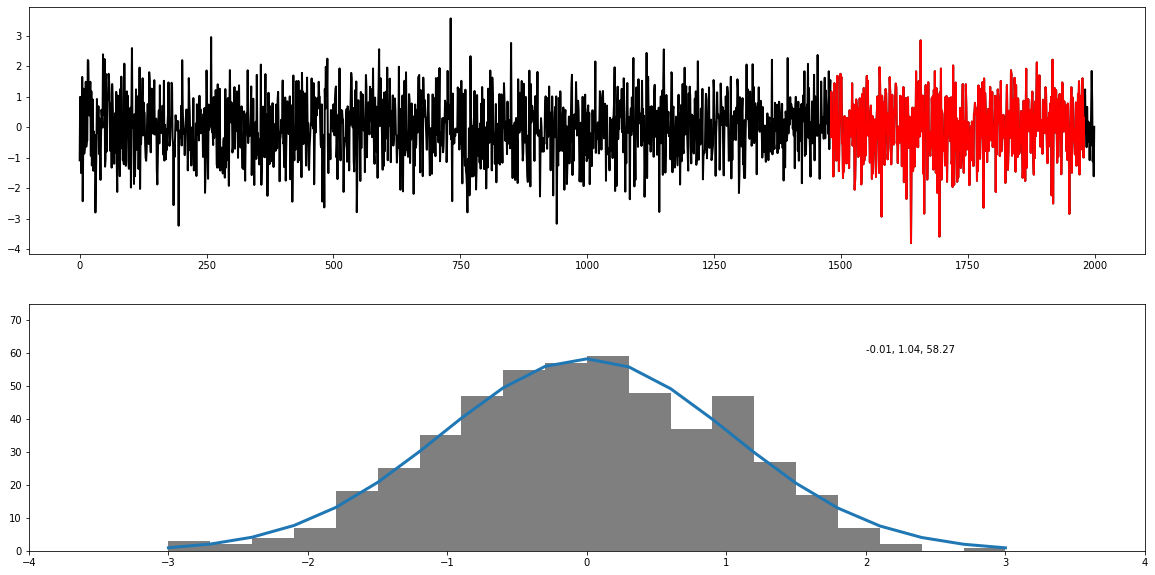

In [66]:
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt
from IPython.display import clear_output

import time #to slow down the animation


# create figure and axes 
fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

#crete the time series: gaussian random
N = 2000
np.random.seed(123)
y = np.random.randn(N)
t = np.linspace(0, N, N, endpoint=False)


# plot the time series
ts, = ax1.plot(t, y, '-k', lw=2)

# plot the distribution of a segment of the time series
x = np.arange(-3,3.3,0.3)
dist = ax2.hist(y[0:500], bins=x, color="k", alpha=0.5)
plt.show()

def gauss(x, m, s):
  '''gaussian functional form
  Input: 
  x: the value where to caluculate the probability
  m: the mean of the gaussian
  s: the standard deviation of the Gaussian
  '''
  return np.exp(-(x-m)**2 / 2 / s**2)

def L2(args, x, y):
  m, s, a = args
  return ((y - a * gauss(x, m, s))**2).sum()

#loop over the segments of the time series
for i in range(0,1500,20):
  fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))
  clear_output(wait=True)
  
  ts, = ax1.plot(t, y, '-k', lw=2) #plot the whole time series
  ax1.plot(t[i:i+500], y[i:i+500], '-r', lw=2) #plot the segment in red
  dist = ax2.hist(y[i:i+500], bins=x, color="k", alpha=0.5) #plot the points distribution
  #fit a gaussian to the data
  fit = optimize.minimize(L2, (0, 1, 70), 
                    args=(dist[1][:-1] + np.diff(dist[1])[0] / 2, 
                                      dist[0]))

  #plot the gaussian
  ax2.plot(x, fit.x[2] * gauss(x, fit.x[0], fit.x[1]), lw=3) #plot the Gaussian the points are generated from
  ax2.text(2, 60, "%.2f, %.2f, %.2f"%(fit.x[0], fit.x[1], fit.x[2]))
  
  ax2.set_xlim(-4,4)
  ax2.set_ylim(0,75)
  plt.show() 
  time.sleep(0.1)
